##Carga e inspección inicial de los datos

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd '/content/drive/MyDrive/Programacion 2/Proyecto'

/content/drive/MyDrive/Programacion 2/Proyecto


In [5]:
!ls

'Copia de Untitled0.ipynb'	        tesla_deliveries_dataset_2015_2025.xlsx
'Proyecto Final Programacion 2.ipynb'


In [6]:

df= pd.read_excel('tesla_deliveries_dataset_2015_2025.xlsx')
df

,Year,Month,Region,Model,Estimated_Deliveries,Production_Units,Avg_Price_USD,Battery_Capacity_kWh,Range_km,CO2_Saved_tons,Source_Type,Charging_Stations
0,2023,5,Europe,Model S,17646,17922,92874.27,120,704,1863.42,Interpolated (Month),12207
1,2015,2,Asia,Model X,3797,4164,62205.65,75,438,249.46,Official (Quarter),7640
2,2019,1,North America,Model X,8411,9189,117887.32,82,480,605.59,Interpolated (Month),14071
3,2021,2,North America,Model 3,6555,7311,89294.91,120,712,700.07,Official (Quarter),9333
4,2016,12,Middle East,Model Y,12374,13537,114846.78,120,661,1226.88,Estimated (Region),8722
...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2021,10,Middle East,Model Y,13488,14333,113771.10,120,719,1454.68,Official (Quarter),4273
2636,2019,7,Middle East,Model S,18300,18407,81889.67,82,487,1336.81,Official (Quarter),9833
2637,2019,9,Asia,Model S,13291,14839,97139.38,100,580,1156.32,Estimated (Region),13709
2638,2020,5,Asia,Cybertruck,3471,3714,69990.57,60,358,186.39,Interpolated (Month),6754


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  2640 non-null   int64  
 1   Month                 2640 non-null   int64  
 2   Region                2640 non-null   object 
 3   Model                 2640 non-null   object 
 4   Estimated_Deliveries  2640 non-null   int64  
 5   Production_Units      2640 non-null   int64  
 6   Avg_Price_USD         2640 non-null   float64
 7   Battery_Capacity_kWh  2640 non-null   int64  
 8   Range_km              2640 non-null   int64  
 9   CO2_Saved_tons        2640 non-null   float64
 10  Source_Type           2640 non-null   object 
 11  Charging_Stations     2640 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 247.6+ KB


In [8]:
df.shape

(2640, 12)

In [9]:
df.rename(columns={'Year':'Año',
                   'Month': 'Mes',
                   'Model': 'Modelo',
                   'Estimated_Deliveries' : 'Envios_Estimados',
                   'Production_Units': 'Produccion_Unidades',
                   'Avg_Price_USD': 'Precio_Promedio_USD',
                   'Battery_Capacity_kWh': 'Capacidad_Bateria_kWh',
                   'Range_km': 'Rango_km',
                   'CO2_Saved_tons': 'Emisiones_CO2_Ahorradas_tons',
                   'Source_Type':'Tipo_de_Fuente',
                   'Charging_Stations': 'Estacion_Carga'}, inplace=True)
df

,Año,Mes,Region,Modelo,Envios_Estimados,Produccion_Unidades,Precio_Promedio_USD,Capacidad_Bateria_kWh,Rango_km,Emisiones_CO2_Ahorradas_tons,Tipo_de_Fuente,Estacion_Carga
0,2023,5,Europe,Model S,17646,17922,92874.27,120,704,1863.42,Interpolated (Month),12207
1,2015,2,Asia,Model X,3797,4164,62205.65,75,438,249.46,Official (Quarter),7640
2,2019,1,North America,Model X,8411,9189,117887.32,82,480,605.59,Interpolated (Month),14071
3,2021,2,North America,Model 3,6555,7311,89294.91,120,712,700.07,Official (Quarter),9333
4,2016,12,Middle East,Model Y,12374,13537,114846.78,120,661,1226.88,Estimated (Region),8722
...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2021,10,Middle East,Model Y,13488,14333,113771.10,120,719,1454.68,Official (Quarter),4273
2636,2019,7,Middle East,Model S,18300,18407,81889.67,82,487,1336.81,Official (Quarter),9833
2637,2019,9,Asia,Model S,13291,14839,97139.38,100,580,1156.32,Estimated (Region),13709
2638,2020,5,Asia,Cybertruck,3471,3714,69990.57,60,358,186.39,Interpolated (Month),6754


##Descripción de los valores numéricos discretos

In [10]:
df[['Envios_Estimados', 'Produccion_Unidades', 'Precio_Promedio_USD', 'Capacidad_Bateria_kWh', 'Rango_km', 'Emisiones_CO2_Ahorradas_tons']].describe()

,Envios_Estimados,Produccion_Unidades,Precio_Promedio_USD,Capacidad_Bateria_kWh,Rango_km,Emisiones_CO2_Ahorradas_tons
count,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000
mean,9922.199621,10655.847348,84907.340330,87.059470,500.257576,744.076989
std,3935.950093,4260.600858,20123.258036,20.836265,120.868549,353.221224
min,48.000000,50.000000,50003.700000,60.000000,330.000000,3.070000
25%,7292.000000,7828.250000,67726.365000,75.000000,418.000000,499.620000
50%,9857.000000,10546.500000,85058.510000,82.000000,470.000000,699.515000
75%,12510.250000,13469.000000,102373.042500,100.000000,586.250000,943.765000
max,25704.000000,28939.000000,119965.360000,120.000000,719.000000,2548.550000


##Descripción general de las variables categóricas

In [11]:
df['Region'].mode()[0]

'Asia'

In [12]:
df['Modelo'].mode()[0]

'Cybertruck'

In [13]:
df['Tipo_de_Fuente'].mode()[0]

'Interpolated (Month)'

#Manejo de datos faltantes.

##Eliminación de la Variable "Estacion_Carga"

Eliminamos la variable "Estacion_Carga" debido a que no contenia información pertienente para un análisis.

In [14]:
df.pop('Estacion_Carga')

,Estacion_Carga
0,12207
1,7640
2,14071
3,9333
4,8722
...,...
2635,4273
2636,9833
2637,13709
2638,6754


Tras mirar la cantidad de valores nulos por variable se observó que en ninguna de estas habían datos nulos.

In [15]:
df.isnull().sum()

,0
Año,0
Mes,0
Region,0
Modelo,0
Envios_Estimados,0
Produccion_Unidades,0
Precio_Promedio_USD,0
Capacidad_Bateria_kWh,0
Rango_km,0
Emisiones_CO2_Ahorradas_tons,0


##Mapa de calor de datos nulos

Se hizo un mapa de calor para poder comprobar lo dicho anteriormente.

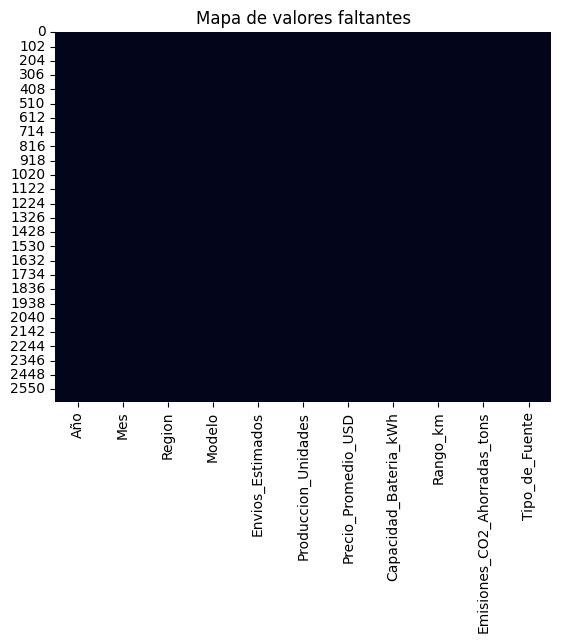

In [16]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Mapa de valores faltantes")
plt.show()

##Identificación de outliers

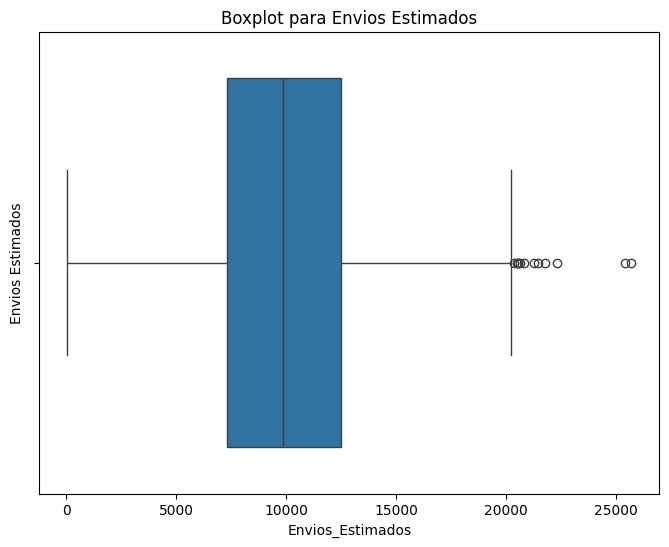

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Envios_Estimados'])
plt.title('Boxplot para Envios Estimados')
plt.ylabel('Envios Estimados')
plt.show()

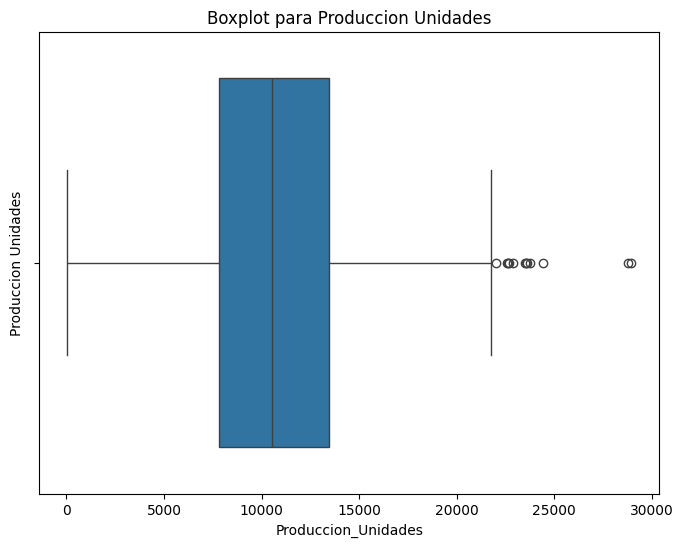

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Produccion_Unidades'])
plt.title('Boxplot para Produccion Unidades')
plt.ylabel('Produccion Unidades')
plt.show()

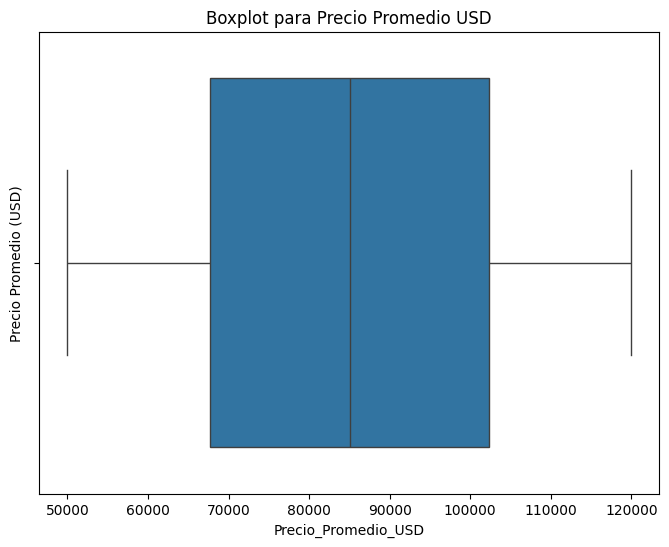

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Precio_Promedio_USD'])
plt.title('Boxplot para Precio Promedio USD')
plt.ylabel('Precio Promedio (USD)')
plt.show()

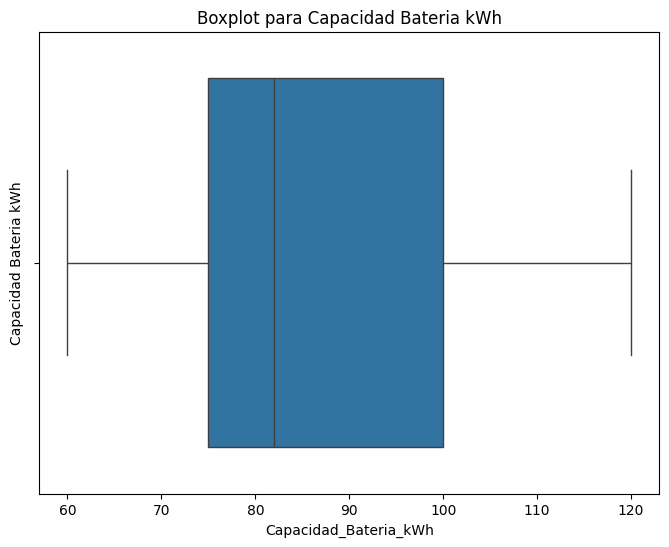

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Capacidad_Bateria_kWh'])
plt.title('Boxplot para Capacidad Bateria kWh')
plt.ylabel('Capacidad Bateria kWh')
plt.show()

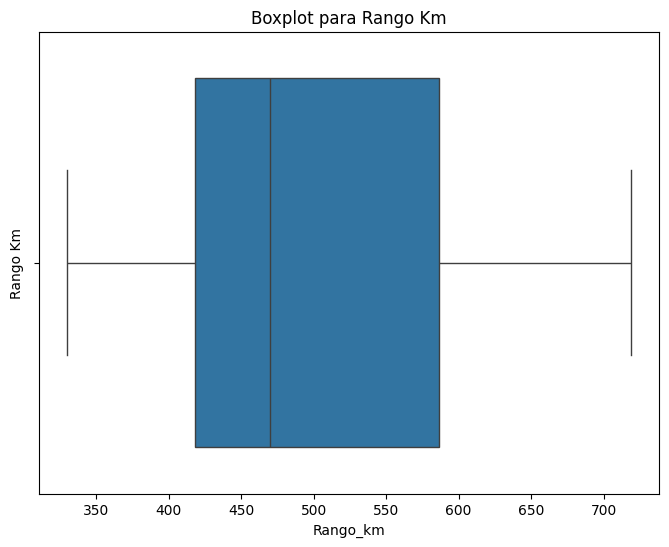

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Rango_km'])
plt.title('Boxplot para Rango Km')
plt.ylabel('Rango Km')
plt.show()

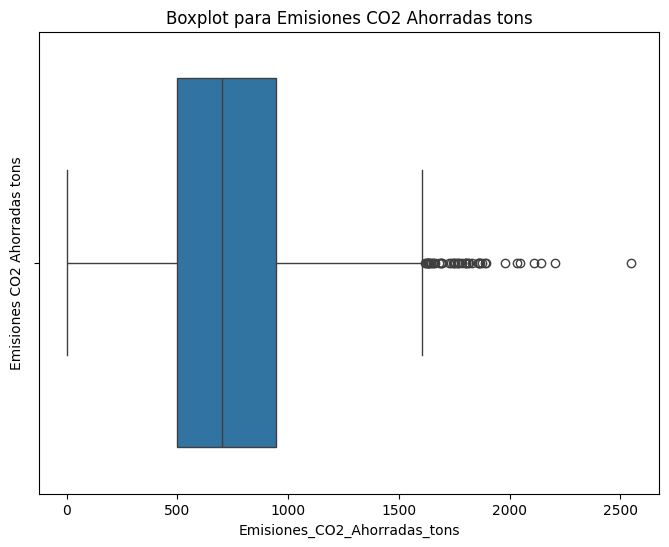

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Emisiones_CO2_Ahorradas_tons'])
plt.title('Boxplot para Emisiones CO2 Ahorradas tons')
plt.ylabel('Emisiones CO2 Ahorradas tons')
plt.show()

##Conclusión outliers
Se visualizó las diferentes variables continuas en busca de outliers y se identificó lo siguiente:

1.A pesar de que la mayoría de las variables no poseen outliers, las restantes presentan una cantidad elevada de valores atípicos que son importantes para el análisis, por lo tanto no se eliminan.


#Tratamiento de valores inconsistentes en texto y duplicados

##Valores duplicados

Se observó que en el dataFrame no hay entradas duplicadas.

In [23]:
df[df.duplicated(keep=False)]

,Año,Mes,Region,Modelo,Envios_Estimados,Produccion_Unidades,Precio_Promedio_USD,Capacidad_Bateria_kWh,Rango_km,Emisiones_CO2_Ahorradas_tons,Tipo_de_Fuente


In [24]:
df['Region'].value_counts()

,count
Region,
Europe,660
Asia,660
North America,660
Middle East,660


Al igual que el nombre de todas las variables, se decidió cambiar los nombres de los valores de la variable "Region" puesto que estaban en otro lenguaje (Inglés), que por comodidad de lectura se cambió al idioma Español.


In [25]:
mapeo={'Asia':'Asia',
       'Europe':'Europa',
       'North America':'America del Norte',
       'Middle East':'Oriente Medio'
}
df['Region']=df['Region'].map(mapeo)
df

,Año,Mes,Region,Modelo,Envios_Estimados,Produccion_Unidades,Precio_Promedio_USD,Capacidad_Bateria_kWh,Rango_km,Emisiones_CO2_Ahorradas_tons,Tipo_de_Fuente
0,2023,5,Europa,Model S,17646,17922,92874.27,120,704,1863.42,Interpolated (Month)
1,2015,2,Asia,Model X,3797,4164,62205.65,75,438,249.46,Official (Quarter)
2,2019,1,America del Norte,Model X,8411,9189,117887.32,82,480,605.59,Interpolated (Month)
3,2021,2,America del Norte,Model 3,6555,7311,89294.91,120,712,700.07,Official (Quarter)
4,2016,12,Oriente Medio,Model Y,12374,13537,114846.78,120,661,1226.88,Estimated (Region)
...,...,...,...,...,...,...,...,...,...,...,...
2635,2021,10,Oriente Medio,Model Y,13488,14333,113771.10,120,719,1454.68,Official (Quarter)
2636,2019,7,Oriente Medio,Model S,18300,18407,81889.67,82,487,1336.81,Official (Quarter)
2637,2019,9,Asia,Model S,13291,14839,97139.38,100,580,1156.32,Estimated (Region)
2638,2020,5,Asia,Cybertruck,3471,3714,69990.57,60,358,186.39,Interpolated (Month)


#Creación de variables

#1)
Se creó la variable "Volumen_total" correspondiente a la suma de la variable "Envios_estimados" y la variable "Produccion_de_unidades".

La suma de estas variables da como resultado el número total de modelos en circulación, obteniendo asi acerca de 54,326,044.


In [26]:
df['Volumen_Total'] = df['Envios_Estimados'] + df['Produccion_Unidades']
df

,Año,Mes,Region,Modelo,Envios_Estimados,Produccion_Unidades,Precio_Promedio_USD,Capacidad_Bateria_kWh,Rango_km,Emisiones_CO2_Ahorradas_tons,Tipo_de_Fuente,Volumen_Total
0,2023,5,Europa,Model S,17646,17922,92874.27,120,704,1863.42,Interpolated (Month),35568
1,2015,2,Asia,Model X,3797,4164,62205.65,75,438,249.46,Official (Quarter),7961
2,2019,1,America del Norte,Model X,8411,9189,117887.32,82,480,605.59,Interpolated (Month),17600
3,2021,2,America del Norte,Model 3,6555,7311,89294.91,120,712,700.07,Official (Quarter),13866
4,2016,12,Oriente Medio,Model Y,12374,13537,114846.78,120,661,1226.88,Estimated (Region),25911
...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2021,10,Oriente Medio,Model Y,13488,14333,113771.10,120,719,1454.68,Official (Quarter),27821
2636,2019,7,Oriente Medio,Model S,18300,18407,81889.67,82,487,1336.81,Official (Quarter),36707
2637,2019,9,Asia,Model S,13291,14839,97139.38,100,580,1156.32,Estimated (Region),28130
2638,2020,5,Asia,Cybertruck,3471,3714,69990.57,60,358,186.39,Interpolated (Month),7185


In [56]:
df['Volumen_Total'].sum()

np.int64(54326044)

##2)
Se creó la variable "Autonomia" con base a la variable "Rango_km".

Utilizando los percentiles de la variable "Rango_Km" se estableció una función que categoriza los diferentes rangos de autonomía en cada modelo de vehículo.

In [28]:
df['Rango_km'].describe()

,Rango_km
count,2640.000000
mean,500.257576
std,120.868549
min,330.000000
25%,418.000000
50%,470.000000
75%,586.250000
max,719.000000


In [29]:
def auto(km):
  if km<418:
    return 'Baja'
  elif km<=470:
    return 'Media'
  else:
    return 'Alta'

df['Autonomia']=df['Rango_km'].map(auto)
df

,Año,Mes,Region,Modelo,Envios_Estimados,Produccion_Unidades,Precio_Promedio_USD,Capacidad_Bateria_kWh,Rango_km,Emisiones_CO2_Ahorradas_tons,Tipo_de_Fuente,Volumen_Total,Autonomia
0,2023,5,Europa,Model S,17646,17922,92874.27,120,704,1863.42,Interpolated (Month),35568,Alta
1,2015,2,Asia,Model X,3797,4164,62205.65,75,438,249.46,Official (Quarter),7961,Media
2,2019,1,America del Norte,Model X,8411,9189,117887.32,82,480,605.59,Interpolated (Month),17600,Alta
3,2021,2,America del Norte,Model 3,6555,7311,89294.91,120,712,700.07,Official (Quarter),13866,Alta
4,2016,12,Oriente Medio,Model Y,12374,13537,114846.78,120,661,1226.88,Estimated (Region),25911,Alta
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2021,10,Oriente Medio,Model Y,13488,14333,113771.10,120,719,1454.68,Official (Quarter),27821,Alta
2636,2019,7,Oriente Medio,Model S,18300,18407,81889.67,82,487,1336.81,Official (Quarter),36707,Alta
2637,2019,9,Asia,Model S,13291,14839,97139.38,100,580,1156.32,Estimated (Region),28130,Alta
2638,2020,5,Asia,Cybertruck,3471,3714,69990.57,60,358,186.39,Interpolated (Month),7185,Baja


In [58]:
df['Autonomia'].value_counts()

,count
Autonomia,
Alta,1316
Media,683
Baja,641


##3)
Se creó la variable "Ratio_Envios_Por_Unidad" dividiendo las variables "Produccion_Unidades" entre "Envios_Estimados".

Esto nos proporciona un ratio, el cual, describe la comparación de la demanda de cada modelo, concluyendo que:

1) Si el ratio es mayor a uno, entonces la oferta es mayor a la demanda.

2) Si el ratio es menor a uno, entonces la demanda es mayor que la oferta.

3) Si el ratio es igual a uno, entonces la oferta y la demanda son estables.

En conclusión, "Tesla" maneja una oferta mayor o igual a la demanda.

In [30]:
df['Ratio_Envios_Por_Unidad']=round(df['Produccion_Unidades']/df['Envios_Estimados'],2)
df

,Año,Mes,Region,Modelo,Envios_Estimados,Produccion_Unidades,Precio_Promedio_USD,Capacidad_Bateria_kWh,Rango_km,Emisiones_CO2_Ahorradas_tons,Tipo_de_Fuente,Volumen_Total,Autonomia,Ratio_Envios_Por_Unidad
0,2023,5,Europa,Model S,17646,17922,92874.27,120,704,1863.42,Interpolated (Month),35568,Alta,1.02
1,2015,2,Asia,Model X,3797,4164,62205.65,75,438,249.46,Official (Quarter),7961,Media,1.10
2,2019,1,America del Norte,Model X,8411,9189,117887.32,82,480,605.59,Interpolated (Month),17600,Alta,1.09
3,2021,2,America del Norte,Model 3,6555,7311,89294.91,120,712,700.07,Official (Quarter),13866,Alta,1.12
4,2016,12,Oriente Medio,Model Y,12374,13537,114846.78,120,661,1226.88,Estimated (Region),25911,Alta,1.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2021,10,Oriente Medio,Model Y,13488,14333,113771.10,120,719,1454.68,Official (Quarter),27821,Alta,1.06
2636,2019,7,Oriente Medio,Model S,18300,18407,81889.67,82,487,1336.81,Official (Quarter),36707,Alta,1.01
2637,2019,9,Asia,Model S,13291,14839,97139.38,100,580,1156.32,Estimated (Region),28130,Alta,1.12
2638,2020,5,Asia,Cybertruck,3471,3714,69990.57,60,358,186.39,Interpolated (Month),7185,Baja,1.07


In [60]:
df['Ratio_Envios_Por_Unidad'].value_counts()

,count
Ratio_Envios_Por_Unidad,
1.03,216
1.14,189
1.05,188
1.07,187
1.04,182
1.11,182
1.12,181
1.01,180
1.06,175


##4)
Se creó la variable "Gamma" con base a la variable "Precio_Promedio_USD" implementando una función para categorizar sus valores en "Alta", "Mediana" o "Baja" a partir de sus percentiles.

In [31]:
df['Precio_Promedio_USD'].describe()

,Precio_Promedio_USD
count,2640.000000
mean,84907.340330
std,20123.258036
min,50003.700000
25%,67726.365000
50%,85058.510000
75%,102373.042500
max,119965.360000


In [32]:
def gamma(n):
  if n<67726.365:
    return 'Baja'
  elif n<=85058.51:
    return 'Media'
  else:
    return 'Alta'

df['Gamma']=df['Precio_Promedio_USD'].map(gamma)
df

,Año,Mes,Region,Modelo,Envios_Estimados,Produccion_Unidades,Precio_Promedio_USD,Capacidad_Bateria_kWh,Rango_km,Emisiones_CO2_Ahorradas_tons,Tipo_de_Fuente,Volumen_Total,Autonomia,Ratio_Envios_Por_Unidad,Gamma
0,2023,5,Europa,Model S,17646,17922,92874.27,120,704,1863.42,Interpolated (Month),35568,Alta,1.02,Alta
1,2015,2,Asia,Model X,3797,4164,62205.65,75,438,249.46,Official (Quarter),7961,Media,1.10,Baja
2,2019,1,America del Norte,Model X,8411,9189,117887.32,82,480,605.59,Interpolated (Month),17600,Alta,1.09,Alta
3,2021,2,America del Norte,Model 3,6555,7311,89294.91,120,712,700.07,Official (Quarter),13866,Alta,1.12,Alta
4,2016,12,Oriente Medio,Model Y,12374,13537,114846.78,120,661,1226.88,Estimated (Region),25911,Alta,1.09,Alta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2021,10,Oriente Medio,Model Y,13488,14333,113771.10,120,719,1454.68,Official (Quarter),27821,Alta,1.06,Alta
2636,2019,7,Oriente Medio,Model S,18300,18407,81889.67,82,487,1336.81,Official (Quarter),36707,Alta,1.01,Media
2637,2019,9,Asia,Model S,13291,14839,97139.38,100,580,1156.32,Estimated (Region),28130,Alta,1.12,Alta
2638,2020,5,Asia,Cybertruck,3471,3714,69990.57,60,358,186.39,Interpolated (Month),7185,Baja,1.07,Media


In [61]:
df['Gamma'].value_counts()

,count
Gamma,
Alta,1320
Baja,660
Media,660


#Filtrado y condiciones en Pandas

##1)
Se observó que solo existen 1320 vehículos de gamma alta.

In [39]:
df2=df[(df['Gamma']=='Alta')]
df2.shape[0]

1320

##2)
Se visualizó que hay unicamente 77 vehículos que tienen un ratio igual a 1, es decir que, la oferta es igual a la demanda.

In [40]:
df3=df[(df['Ratio_Envios_Por_Unidad']==1)]
df3.shape[0]

77

##3)
Se puede concluir que hay 132 vehículos de modelo "Cybertruck" que se importaron a Asia.

In [41]:
df4=df[(df['Modelo']=='Cybertruck') & ((df['Region'])=='Asia')]
df4.shape[0]

132

##4)
Se observó que existen 254 vehículos de modelo "Cybertruck" de gamma alta.

In [42]:
df5=df[(df['Modelo']=='Cybertruck') & ((df['Gamma'])=='Alta')]
df5.shape[0]

254

In [68]:
df[(df['Modelo']=='Cybertruck')].shape[0] #Total de Cybertrucks

528

##5)
Se visualizó que solo existen 1316 vehiculos que tienen una autonomia alta

In [43]:
df6=df[(df['Autonomia']=='Alta')]
df6.shape[0]

1316

##6)
Se puede concluir que existen 641 vehículos que tienen una autonomía baja.

In [44]:
df7=df[(df['Autonomia']=='Baja')]
df7.shape[0]

641

##7)
Se observó que existen 660 vehículos con precio mayor al 75% del promedio de USD y son de gamma alta.

In [45]:
df8=df[(df['Precio_Promedio_USD']>102373.042500) & (df['Gamma']=='Alta')]
df8.shape[0]

660

##8)
Se visualizó que existen 320 vehículos que ahorran mas del 75% de CO2 (En toneladas) y que son de gamma alta.

In [46]:
df9=df[(df['Emisiones_CO2_Ahorradas_tons']>943.765000) & (df['Gamma']=='Alta')]
df9.shape[0]

320

##9)
Se puede concluir que existen 157 vehículos que ahorran más del 75% de CO2 (En toneladas) y que son de gamma baja.

In [47]:
df10=df[(df['Emisiones_CO2_Ahorradas_tons']>943.765000) & (df['Gamma']=='Baja')]
df10.shape[0]

157

##Agrupación con Groupby

##1)
Se agruparon las variables "Año" y "Envios_Estimados" para visualizar cuántos envíos estimados se hacen por año.

In [33]:
df.groupby('Año')['Envios_Estimados'].sum()


,Envios_Estimados
Año,
2015,2375267
2016,2434081
2017,2350517
2018,2423104
2019,2404230
2020,2280336
2021,2335116
2022,2434220
2023,2382375


##2)
Tras la agrupación de las variables "Autonomia" y "Precio_Promedio_USD", se observó cuál es el promedio en dólares de un vehículo respecto a su autonomía.

In [34]:
df.groupby('Autonomia')['Precio_Promedio_USD'].mean()

,Precio_Promedio_USD
Autonomia,
Alta,84945.585897
Baja,85795.072184
Media,84000.506823


##3)
Con la agrupación de las variables "Modelo" y "Gamma" se obtuvo cuántos vehículos de las diferentes gammas se produjeron.

In [35]:
df.groupby('Modelo')['Gamma'].value_counts()

Modelo      Gamma
Cybertruck  Alta     254
            Baja     147
            Media    127
Model 3     Alta     264
            Baja     132
            Media    132
Model S     Alta     264
            Media    148
            Baja     116
Model X     Alta     259
            Baja     146
            Media    123
Model Y     Alta     279
            Media    130
            Baja     119
Name: count, dtype: int64

##4)
Se agrupó la variable "Modelo" con la variable "Emisiones_CO2_Ahorradas_tons" para averiguar cuánto CO2 por tonelada ahorra cada modelo.

In [69]:
df.groupby('Modelo')['Emisiones_CO2_Ahorradas_tons'].sum().sort_values(ascending=False)

,Emisiones_CO2_Ahorradas_tons
Modelo,
Model 3,402821.31
Model S,402671.38
Model Y,388650.15
Model X,387962.21
Cybertruck,382258.20


##5)
Al agrupar las variables "Region" y "Modelo" con la variable "Volumen_Total", se obtuvo el volumen total por cada región y por cada modelo disponible.

In [37]:
df.groupby(['Region', 'Modelo'])['Volumen_Total'].sum().unstack(fill_value=0)

Modelo,Cybertruck,Model 3,Model S,Model X,Model Y
Region,,,,,
America del Norte,2669906,2705491,2554366,2690290,2780467
Asia,2514422,2790014,2904410,2687118,2658347
Europa,2590773,2769298,2800642,2679685,2638701
Oriente Medio,2821749,2778310,2889591,2638382,2764082


#Visualizaciones

##1) Gráfico de barras respecto al total de envíos estimados por año

En la gráfica se observa que los envíos estimados se mantienen en un rango entre 2.0 y 2.5, lo que indica que existe una demanda constante sin grandes variaciones.

La menor cantidad de envíos estimados se presentó en 2020 y la mayor cantidad en 2022.


/tmp/ipython-input-347108685.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Año', y='Envios_Estimados', data=data_to_plot, palette='viridis')


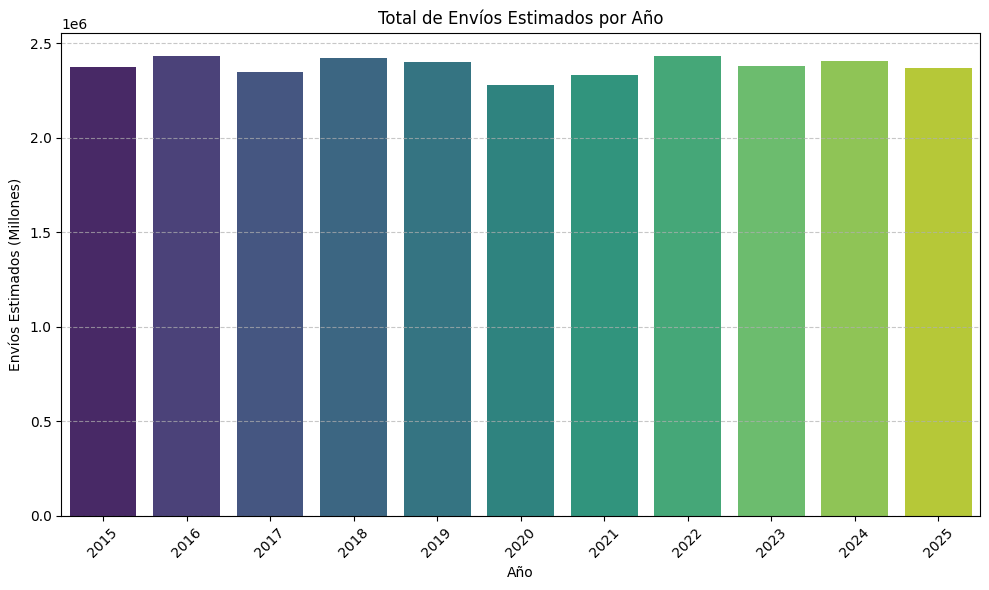

In [48]:
data_to_plot = df.groupby('Año')['Envios_Estimados'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Año', y='Envios_Estimados', data=data_to_plot, palette='viridis')
plt.title('Total de Envíos Estimados por Año')
plt.xlabel('Año')
plt.ylabel('Envíos Estimados (Millones)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##2) Gráfico de barras del precio promedio (USD) por autonomía

A partir de la gráfica se analiza que el precio promedio por autonomía supera los 80,000 USD en los tres casos (Alta, Media y Baja), presentando una baja variación entre ellos.

El precio promedio más alto corresponde a los modelos de autonomía baja, mientras que el más bajo se encuentra en los modelos de autonomía media.

/tmp/ipython-input-2371855897.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Autonomia', y='Precio_Promedio_USD', data=data_autonomia_precio, palette='inferno')


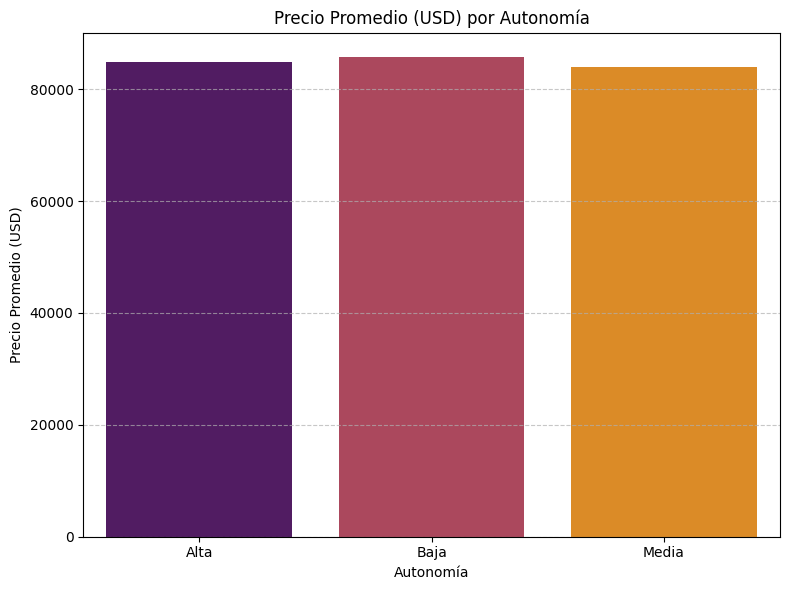

In [49]:
data_autonomia_precio = df.groupby('Autonomia')['Precio_Promedio_USD'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Autonomia', y='Precio_Promedio_USD', data=data_autonomia_precio, palette='inferno')
plt.title('Precio Promedio (USD) por Autonomía')
plt.xlabel('Autonomía')
plt.ylabel('Precio Promedio (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#3) Boxplot de la capacidad de bateria por región

En este gráfico se observa que la capacidad de la bateria de los modelos presentados se mantiene igual en todas las regiones, lo cual, no proporciona mayor información.




/tmp/ipython-input-1749840348.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Capacidad_Bateria_kWh', data=df, palette='Set2')


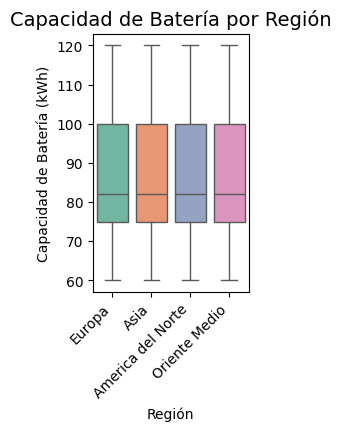

In [50]:
plt.subplot(1, 3, 3) # Fila 1, Columna 3 de 3
sns.boxplot(x='Region', y='Capacidad_Bateria_kWh', data=df, palette='Set2')
plt.title('Capacidad de Batería por Región', fontsize=14)
plt.xlabel('Región')
plt.ylabel('Capacidad de Batería (kWh)')
plt.xticks(rotation=45, ha='right')



plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#4) Gráficos de pastel del ratio de envío por unidad y por región

Las cuatro regiones mantienen una distribución muy similar a lo largo de los años:

- América del Norte varía entre 24.9% y 25.2%.

- Asia varía entre 24.7% y 25.1%.

- Oriente Medio varía entre 24.8% y 25.2%.

- Europa varía entre 24.8% y 25.2%.

Teniendo en cuenta lo anterior se puede concluir que, a lo largo de 11 años en las diferentes regiones, la variación fue de aproximadamente un 0.5%.

/tmp/ipython-input-2065706980.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('flare', len(labels))


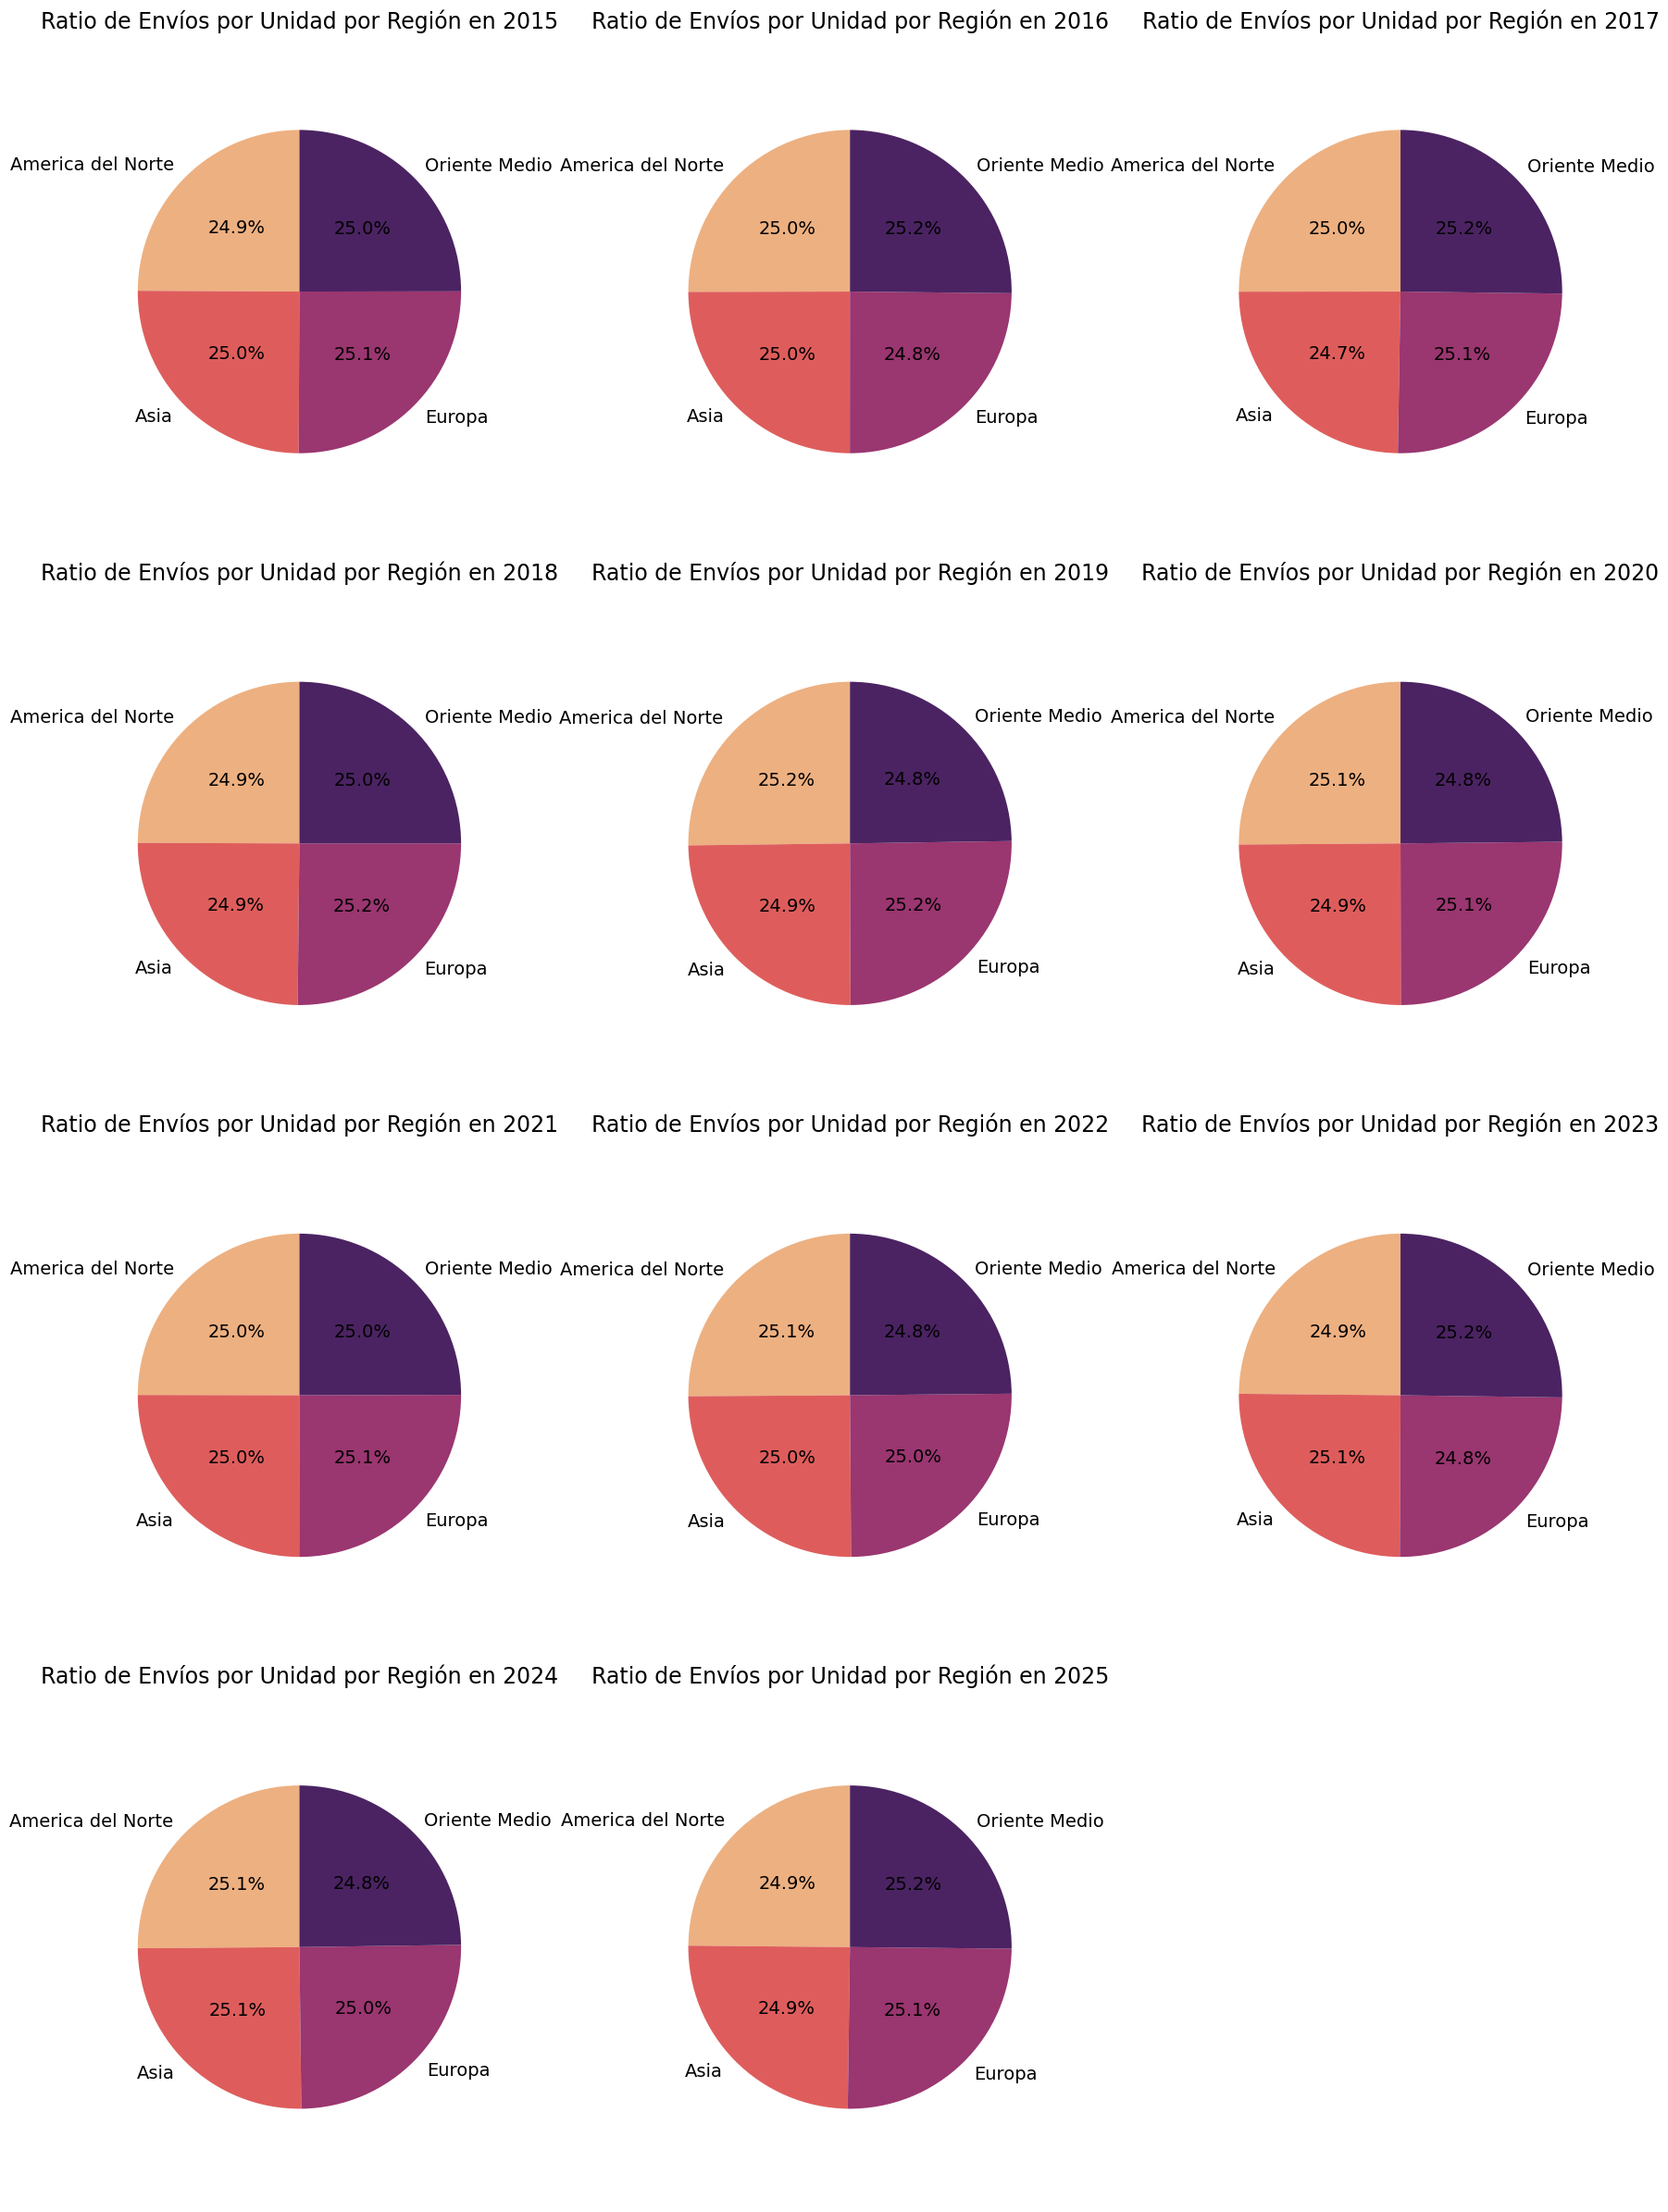

In [51]:
data_ratio_region_year = df.groupby(['Año', 'Region'])['Ratio_Envios_Por_Unidad'].mean().reset_index()

years = sorted(data_ratio_region_year['Año'].unique())
num_years = len(years)

# Determinar el tamaño de la cuadrícula para los subplots
cols = 3 # Número de columnas de gráficos
rows = (num_years + cols - 1) // cols # Calcular el número de filas necesario

plt.figure(figsize=(6 * cols, 6 * rows))

for i, year in enumerate(years):
    plt.subplot(rows, cols, i + 1)
    year_data = data_ratio_region_year[data_ratio_region_year['Año'] == year]

    # Calcular las proporciones para el gráfico de pastel
    total_ratio_year = year_data['Ratio_Envios_Por_Unidad'].sum()
    if total_ratio_year == 0: # Evitar división por cero si todas las ratios son 0
        sizes = [0] * len(year_data['Region'])
        labels = year_data['Region'].tolist()
    else:
        sizes = (year_data['Ratio_Envios_Por_Unidad'] / total_ratio_year) * 100
        labels = year_data['Region']

    # Generar colores de la paleta 'viridis' y convertirlos a una lista
    cmap = cm.get_cmap('flare', len(labels))
    colors = [cmap(j) for j in np.linspace(0, 1, len(labels))]

    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.55, textprops={'fontsize': 14}, colors=colors)
    plt.title(f'Ratio de Envíos por Unidad por Región en {year}', fontsize=17) # Aumentar el tamaño de la fuente del título
    plt.axis('equal') # Asegura que el pastel se dibuje como un círculo.

plt.tight_layout()
plt.show()

#5) Gráfico de barras agrupadas de emisiones de CO2 ahorradas por región

En la gráfica se observa que todas las regiones varían en un rango aproximado de 87,000 a 105,000 toneladas. Además, las emisiones de CO2 ahorradas por región según el modelo son:

- América del Norte: El modelo que menos emisiones de CO2 ahorra es el "Model S", mientras que el que más ahorra es el "Model 3".

- Asia: El modelo que menos emisiones de CO2 ahorra es el "Cybertruck", y el que más ahorra es el "Model S".

- Europa: El modelo que menos emisiones de CO2 ahorra es el "Model Y", mientras que el que más ahorra es el "Model S".

- Oriente Medio: El modelo que menos emisiones de CO2 ahorra es el "Model X", y el que más ahorra es el "Model 3".

En conclusión, Oriente Medio es la región que más emisiones de CO2 ahorra.

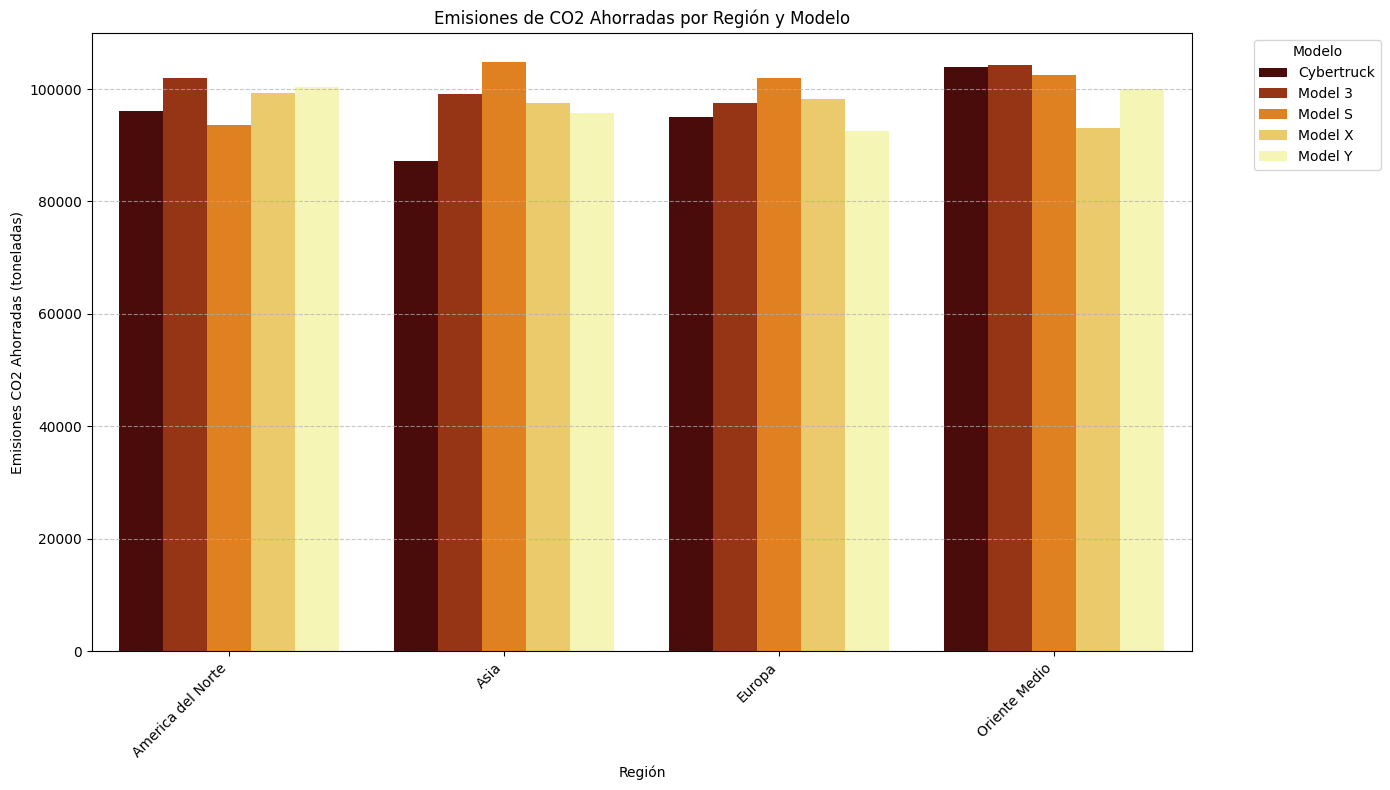

In [53]:
data_co2_region_model = df.groupby(['Region', 'Modelo'])['Emisiones_CO2_Ahorradas_tons'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x='Region', y='Emisiones_CO2_Ahorradas_tons', hue='Modelo', data=data_co2_region_model, palette='afmhot')
plt.title('Emisiones de CO2 Ahorradas por Región y Modelo')
plt.xlabel('Región')
plt.ylabel('Emisiones CO2 Ahorradas (toneladas)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Modelo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



#Conclusiones


1) Tras el análisis realizado con respecto a la variable "Ratio_Envios_Por_Unidad", se infiere que Tesla procura ofrecer una cantidad de vehículos superior a la demanda sin que le genere grandes perdidas para así mantener a todos sus clientes satisfechos.

2) Considerando el límite inferior del rango del precio promedio en dólares (80,000 USD), se deduce que, a pesar de que Tesla tiene una segmentación propia respectiva a la gamma se sigue considerando una marca de lujo, puesto que, en comparación al promedio del mercado, sus "gammas bajas" continúan siendo modelos de gamma alta.

3) Se considera que Tesla es una marca que no discrimina a sus consumidores según su región, lo que supone una estrategia comercial balanceada, de manera que su distribución es equitativa independientemente del modelo.

4) Se presenta una gran cantidad de vehículos de gamma alta (320 unidades) y de gamma Baja (157 unidades) sobre el 35% de los que tienen mayor ahorro de C02, lo que demuestra que los beneficios de la reducción de carbono no son exclusivos de los vehículos de gamma alta, sino que también están presentes en los modelos más asequibles. Esta comparación es necesaria para la implementación de una estrategia de promoción de los vehículos eléctricos Tesla, debido a que esto valida con más fuerza su ahorro de emisiones C02 frente al mercado.

5) Basándonos en las variables de la base de datos, los modelos no presentan diferencias técnicas significativas, afirmando la equitatividad de la marca respecto a la producción de sus vehículos, lo que sugiere que estos se diferencien en diseño u otras características estéticas y de equipamiento.

